# Get Ouput Per Layer

This notebook gives the model a input and prints the output of each layer.

In [3]:
import torch
from PIL import Image
from torchvision import transforms

from utils.dataloader import VOCDataLoader

# Define transformations
transform = transforms.Compose([
    transforms.Resize((320, 320)),  # Resize to 320x320
    transforms.ToTensor(),         # Convert PIL Image to PyTorch Tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Update the dataloader to use the transformations
loader = VOCDataLoader(train=False, batch_size=1)

In [12]:
from tinyyolov2 import TinyYoloV2
from utils.yolo import nms, filter_boxes
from utils.viz import display_result

# make an instance with 20 classes as output
net = TinyYoloV2(num_classes=20)

# load pretrained weights
sd = torch.load("voc_pretrained.pt")
net.load_state_dict(sd)

#put network in evaluation mode
net.eval()

print("Model state dict keys:", net.state_dict().keys())

def hook_fn(module, input, output):
    print(f"Layer: {module}")
    print(f"Output min: {output.min()}, max: {output.max()}\n")
    if torch.isnan(output).any():
        print(f"NaN detected in layer: {module}\n")

for name, module in net.named_modules():
    module.register_forward_hook(hook_fn)

Model state dict keys: odict_keys(['anchors', 'conv1.weight', 'bn1.weight', 'bn1.bias', 'bn1.running_mean', 'bn1.running_var', 'bn1.num_batches_tracked', 'conv2.weight', 'bn2.weight', 'bn2.bias', 'bn2.running_mean', 'bn2.running_var', 'bn2.num_batches_tracked', 'conv3.weight', 'bn3.weight', 'bn3.bias', 'bn3.running_mean', 'bn3.running_var', 'bn3.num_batches_tracked', 'conv4.weight', 'bn4.weight', 'bn4.bias', 'bn4.running_mean', 'bn4.running_var', 'bn4.num_batches_tracked', 'conv5.weight', 'bn5.weight', 'bn5.bias', 'bn5.running_mean', 'bn5.running_var', 'bn5.num_batches_tracked', 'conv6.weight', 'bn6.weight', 'bn6.bias', 'bn6.running_mean', 'bn6.running_var', 'bn6.num_batches_tracked', 'conv7.weight', 'bn7.weight', 'bn7.bias', 'bn7.running_mean', 'bn7.running_var', 'bn7.num_batches_tracked', 'conv8.weight', 'bn8.weight', 'bn8.bias', 'bn8.running_mean', 'bn8.running_var', 'bn8.num_batches_tracked', 'conv9.weight', 'conv9.bias'])


  0%|                                                                                                                              | 0/5823 [00:00<?, ?it/s]

Input tensor shape: torch.Size([1, 3, 320, 320])
Input tensor min: 0.0, max: 1.0


Layer: Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Output min: nan, max: nan

NaN detected in layer: Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)

Layer: BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
Output min: nan, max: nan

NaN detected in layer: BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

Layer: Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Output min: nan, max: nan

NaN detected in layer: Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)

Layer: BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
Output min: nan, max: nan

NaN detected in layer: BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

Layer: Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1)

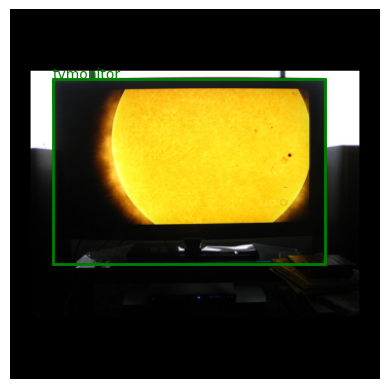

  0%|                                                                                                                              | 0/5823 [00:04<?, ?it/s]


In [13]:
import tqdm

its = 1

for idx, (input, target) in tqdm.tqdm(enumerate(loader), total=len(loader)):

    print(f"Input tensor shape: {input.shape}")
    print(f"Input tensor min: {input.min()}, max: {input.max()}")
    print("\n")

    
    #input is a 1 x 3 x 320 x 320 image
    output = net(input)
    "output is of a tensor of size 32 x 125 x 10 x 10"
    #output is a 32 x 125 x 10 x 10 tensor

    #print(output[0].data)
    
    #filter boxes based on confidence score (class_score*confidence)
    output = filter_boxes(output, 0)

    #print(output[0].data)
    
    #filter boxes based on overlap
    output = nms(output, 0)

    #print(output[0].data)
    
    display_result(input, output, target, file_path='yolo_prediction.png')

    its = its - 1

    if its <= 0:
        break